In [1]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=9affde24052d95872b89ea568c61d9f3f78abbf2f94993a2df1b83b0bcdeac23
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
!pip install scikit-learn

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import dalex as dx

import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display

np.random.seed(123)

In [4]:
df_train = pd.read_csv('fifa_league_21_train.csv')

In [5]:
with open('/content/fifa_league_22_test.csv') as f:
    contents = f.read()

In [6]:
print(df_train.shape)

(1584, 82)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   1584 non-null   object 
 1   overall                      1584 non-null   int64  
 2   potential                    1584 non-null   int64  
 3   value_eur                    1583 non-null   float64
 4   wage_eur                     1584 non-null   float64
 5   age                          1584 non-null   int64  
 6   club_name                    1584 non-null   object 
 7   league_name                  1584 non-null   object 
 8   club_position                1584 non-null   object 
 9   preferred_foot               1584 non-null   object 
 10  weak_foot                    1584 non-null   int64  
 11  skill_moves                  1584 non-null   int64  
 12  international_reputation     1584 non-null   int64  
 13  pace              

In [9]:
features_to_drop = ['short_name', 'club_name', 'league_name', 'preferred_foot', 'wage_eur', 'club_position', 'position']
target_variable = 'value_eur'
df_train.drop(columns=features_to_drop, inplace=True)
print(df_train.shape)

(1584, 75)


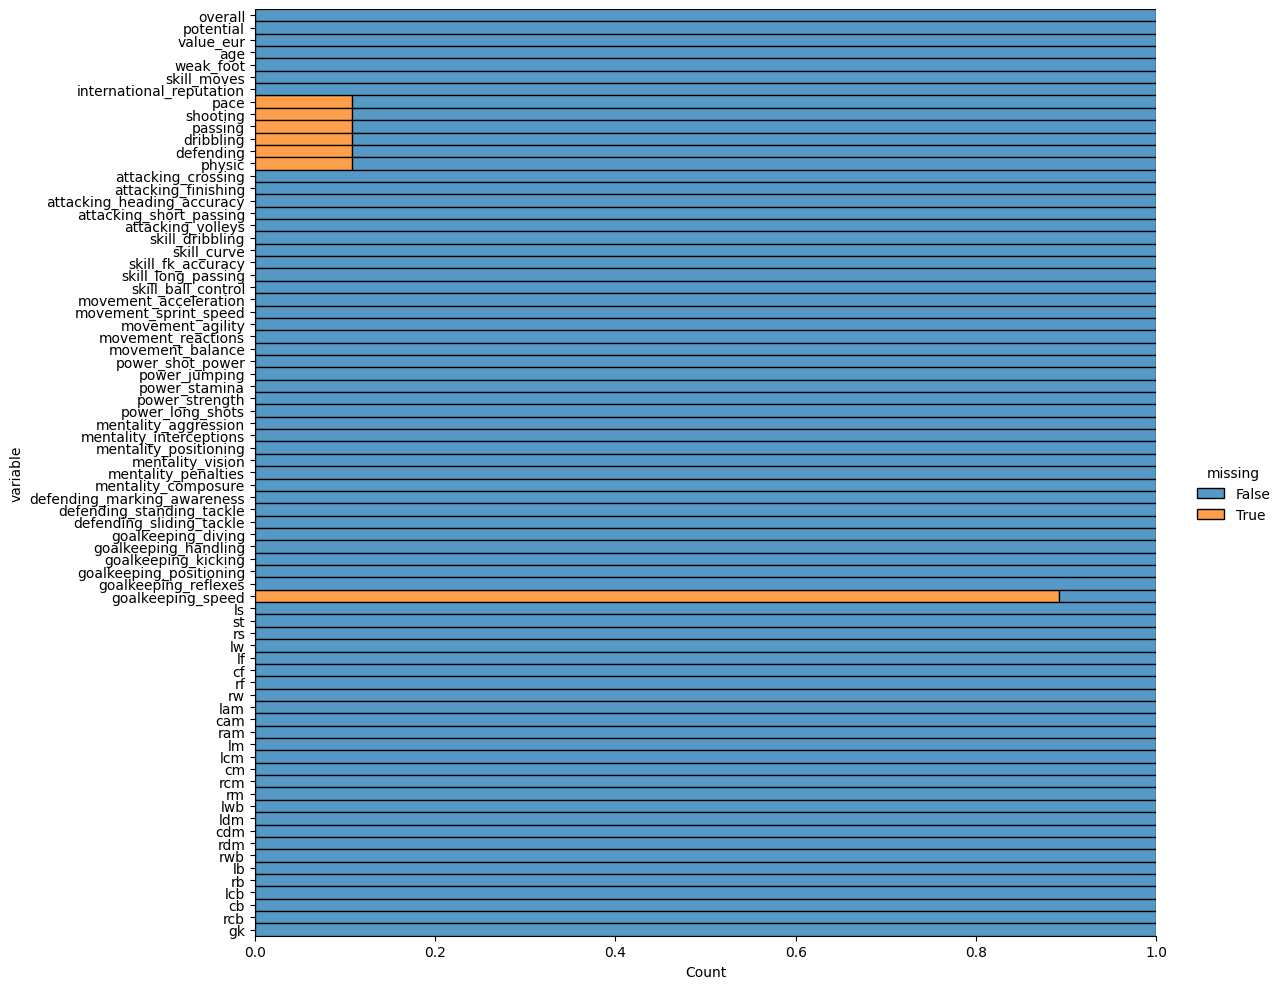

In [10]:
sns.displot(
    data=df_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=10,
    aspect=1.2
)
plt.show()

In [12]:
df_train.drop(columns=['goalkeeping_speed'], inplace=True)
for features in ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']:
    df_train[features].fillna(40, inplace=True)
df_train.dropna(inplace=True)
labels = df_train[target_variable]
df_train.drop(columns=[target_variable], inplace=True)
print(df_train.shape)

(1583, 73)


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1583 entries, 0 to 1583
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      1583 non-null   int64  
 1   potential                    1583 non-null   int64  
 2   age                          1583 non-null   int64  
 3   weak_foot                    1583 non-null   int64  
 4   skill_moves                  1583 non-null   int64  
 5   international_reputation     1583 non-null   int64  
 6   pace                         1583 non-null   float64
 7   shooting                     1583 non-null   float64
 8   passing                      1583 non-null   float64
 9   dribbling                    1583 non-null   float64
 10  defending                    1583 non-null   float64
 11  physic                       1583 non-null   float64
 12  attacking_crossing           1583 non-null   int64  
 13  attacking_finishing    

In [14]:
df_train.describe()

,overall,potential,age,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,rb,lcb,cb,rcb,gk
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,73.734681,79.324700,24.907138,3.118762,2.732154,1.513582,66.998737,57.435881,63.022742,67.363866,56.610234,64.701832,57.180670,51.972836,57.411876,67.205306,49.363234,63.965888,55.857233,48.341756,60.979154,67.006949,67.050537,67.173089,66.701200,70.781428,66.026532,65.702464,66.627922,65.884397,66.926721,54.065698,61.503474,53.308275,57.042956,61.941251,52.694251,67.384081,53.367025,54.289956,51.726469,16.958939,16.698042,16.543272,16.833860,17.230575,63.322173,63.322173,63.322173,62.700569,62.799116,62.799116,62.799116,62.700569,65.315224,65.315224,65.315224,65.477574,64.916614,64.916614,64.916614,65.477574,62.720152,62.756791,62.756791,62.756791,62.720152,61.833228,61.833228,60.468730,60.468730,60.468730,24.924826
std,7.622434,5.306837,4.549166,0.685627,0.945558,0.804325,13.966096,15.596671,12.974281,13.470115,18.313579,12.832019,20.585248,21.894469,19.461971,15.653289,20.289064,20.537348,20.825470,19.738719,16.095525,18.286125,14.604866,14.304185,14.198958,9.806483,14.550294,13.425094,12.048990,16.031414,12.343777,21.490438,18.260991,23.486359,22.200345,15.310762,17.080164,12.527908,22.552142,24.205503,24.019384,19.864527,18.995203,18.492879,19.350668,20.292346,14.915389,14.915389,14.915389,16.161403,15.720861,15.720861,15.720861,16.161403,15.483928,15.483928,15.483928,15.543035,14.841280,14.841280,14.841280,15.543035,15.423254,15.608504,15.608504,15.608504,15.423254,15.750865,15.750865,16.741286,16.741286,16.741286,17.113735
min,49.000000,60.000000,16.000000,1.000000,1.000000,1.000000,30.000000,22.000000,31.000000,33.000000,16.000000,35.000000,7.000000,5.000000,8.000000,11.000000,4.000000,6.000000,7.000000,5.000000,11.000000,10.000000,13.000000,15.000000,20.000000,35.000000,22.000000,24.000000,31.000000,16.000000,24.000000,5.000000,11.000000,6.000000,4.000000,14.000000,8.000000,23.000000,5.000000,7.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,21.000000,21.000000,21.000000,17.000000,18.000000,18.000000,18.000000,17.000000,21.000000,21.000000,21.000000,20.000000,21.000000,21.000000,21.000000,20.000000,18.000000,21.000000,21.000000,21.000000,18.000000,18.000000,18.000000,20.000000,20.000000,20.000000,11.000000
25%,68.000000,76.000000,21.000000,3.000000,2.000000,1.000000,

In [15]:
x_train,x_valid,y_train,y_valid = train_test_split(df_train,labels,test_size=0.2,random_state=123)
model = RandomForestRegressor(n_estimators=790, min_samples_split = 3, random_state=123).fit(x_train, y_train)
y_pred = model.predict(x_valid)
print('R^2 score is:')
r2_score(y_valid, y_pred)

R^2 score is:


0.9362439187667068

In [16]:
#model evaluation on unseen data
df_test = pd.read_csv('fifa_league_22_test.csv')

def predict_player_valuation(df_test, model, player_name):
    '''
    Predict club position from player quality
    '''

    df_test = df_test[df_test['short_name'] == player_name]
    display.display(df_test)
    print(f'Original Valuation for the 2022-2023 season for {player_name} is EUR. {df_test[target_variable].values[0]}')
    df_test.drop(columns=['short_name',
                          'club_name',
                          'league_name',
                          'preferred_foot',
                          'wage_eur',
                          'club_position'], inplace=True)
    df_test.drop(columns=['goalkeeping_speed'], inplace=True)
    df_test.drop(columns=[target_variable], inplace=True)
    for features in ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']:
            df_test[features].fillna(40, inplace=True)

    pred = model.predict(df_test)
    print(f'Predicted Valuation for the 2022-2023 season for {player_name} is EUR. {round(pred[0], 1)}')

In [17]:
predict_player_valuation(df_test, model, player_name = 'J. Sancho')

,short_name,overall,potential,value_eur,wage_eur,age,club_name,league_name,club_position,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,rb,lcb,cb,rcb,gk
45,J. Sancho,87,91,116500000.0,150000.0,21,Manchester United,English Premier League,LM,Right,3,5,3,81.0,76.0,82.0,91.0,36.0,65.0,82,83,38,87,83,92,84,65,70,90,85,78,91,85,90,73,51,77,68,65,44,39,83,87,62,86,32,39,32,7,11,10,11,13,NaN,81,81,81,85,84,84,84,85,88,88,88,88,82,82,82,88,69,65,65,65,69,63,63,51,51,51,22


Original Valuation for the 2022-2023 season for J. Sancho is EUR. 116500000.0
Predicted Valuation for the 2022-2023 season for J. Sancho is EUR. 112242909.9


In [18]:
explainer = dx.Explainer(model,
                         x_valid, y_valid,
                         model_type = 'regression',
                         label='Random Forest')

Preparation of a new explainer is initiated

  -> data              : 317 rows 73 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 317 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Random Forest
  -> predict function  : <function yhat_default at 0x7b93fd4dc0e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.83e+05, mean = 1.35e+07, max = 1.07e+08
  -> model type        : regression will be used
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.17e+07, mean = -5.39e+05, max = 1.08e+07
  -> model_info        : package sklearn

A new explainer has been created!


In [19]:
model_performance = explainer.model_performance("regression")
display.display(model_performance.result)

,mse,rmse,r2,mae,mad
Random Forest,1.766635e+13,4.203136e+06,0.936244,1.313286e+06,272801.687764
